In [3]:
#packages
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [2]:
df = pd.read_csv("Copper_Set.xlsx - Result 1.csv")

In [3]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
#checking the null values
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
# checking the unique values in each columns

for i in df.columns:
    print(i,":", df[i].nunique())

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [7]:
df['item_date_d'] = pd.to_datetime(df['item_date'], format="%Y%m%d", errors="coerce").dt.date
df['quantity_tons_d'] = pd.to_numeric(df['quantity tons'], errors="coerce")
df['delivery_date_d'] = pd.to_datetime(df['delivery date'],format= "%Y%m%d", errors="coerce").dt.date

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               181671 non-null  object 
 1   item_date        181672 non-null  float64
 2   quantity tons    181673 non-null  object 
 3   customer         181672 non-null  float64
 4   country          181645 non-null  float64
 5   status           181671 non-null  object 
 6   item type        181673 non-null  object 
 7   application      181649 non-null  float64
 8   thickness        181672 non-null  float64
 9   width            181673 non-null  float64
 10  material_ref     103754 non-null  object 
 11  product_ref      181673 non-null  int64  
 12  delivery date    181672 non-null  float64
 13  selling_price    181672 non-null  float64
 14  item_date_d      181670 non-null  object 
 15  quantity_tons_d  181672 non-null  float64
 16  delivery_date_d  181670 non-null  obje

In [9]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          0
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_d            3
quantity_tons_d        1
delivery_date_d        3
dtype: int64

In [10]:
# removing 00000 data from material_ref column

df["material_ref"] = df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000")else x)

In [11]:
df.isnull().mean()*100

id                  0.001101
item_date           0.000550
quantity tons       0.000000
customer            0.000550
country             0.015412
status              0.001101
item type           0.000000
application         0.013211
thickness           0.000550
width               0.000000
material_ref       55.398986
product_ref         0.000000
delivery date       0.000550
selling_price       0.000550
item_date_d         0.001651
quantity_tons_d     0.000550
delivery_date_d     0.001651
dtype: float64

In [12]:
# material_ref column has more than 55% of null values so we are droping those null values
# droping id column also

df.drop(['material_ref', 'id'],axis=1, inplace=True)


In [13]:
df.isnull().sum()

item_date           1
quantity tons       0
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       1
item_date_d         3
quantity_tons_d     1
delivery_date_d     3
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08
quantity_tons_d,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09


In [15]:
# selling_price and quantity_tons_d those both columns has negative values so we are treating negative values to replace null values

df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df['quantity_tons_d'] = df['quantity_tons_d'].apply(lambda x: np.nan if x<=0 else x)

In [16]:
df.nunique()

item_date             252
quantity tons      181673
customer             1169
country                17
status                  9
item type               7
application            30
thickness             594
width                1386
product_ref            33
delivery date          28
selling_price        9789
item_date_d           250
quantity_tons_d    181668
delivery_date_d        26
dtype: int64

In [17]:
df.isnull().sum()

item_date           1
quantity tons       0
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_d         3
quantity_tons_d     5
delivery_date_d     3
dtype: int64

In [18]:
# handling the null values using mean, median, mode 

df['item_date_d'].fillna(df["item_date_d"].mode().iloc[0], inplace=True)
df['delivery_date_d'].fillna(df["delivery_date_d"].mode().iloc[0], inplace=True)
df['status'].fillna(df["status"].mode().iloc[0], inplace=True)
df['item_date'].fillna(df["item_date"].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df["delivery date"].mode().iloc[0], inplace=True)

In [19]:
df.isnull().sum()

item_date           0
quantity tons       0
customer            1
country            28
status              0
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       0
selling_price       8
item_date_d         0
quantity_tons_d     5
delivery_date_d     0
dtype: int64

In [20]:
# treating numerical columns into median

df['quantity_tons_d'].fillna(df['quantity_tons_d'].median(),inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [21]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_d        0
quantity_tons_d    0
delivery_date_d    0
dtype: int64

In [22]:
#encoding the catagorical columns

df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_d,quantity_tons_d,delivery_date_d
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,54.151139,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,768.024839,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,386.127949,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,202.411065,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,785.526262,2021-03-01


In [23]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [24]:
df['status'] = df['status'].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4, 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8 })

In [25]:
df['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [26]:
#The OrdinalEncoder() replaces the categories by digits
# The fit_transform() method is used to fit the data into a model and transform it into a form that is more suitable for the model in a single step.


df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])

In [27]:
df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181673.0,2.020738e+07,2.411052e+04,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07


In [29]:
# df.to_csv("Industrial_copper_treat.csv", index= False)

In [30]:
# handling the skewness using log transformation

# Skewness is a measurement of the distortion of symmetrical distribution or asymmetry in a data set.
# Skewness can be used to obtain approximate probabilities and quantiles of distributions

# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [31]:
skewed_columns = ['quantity_tons_d', 'customer', 'country', 'status', 'item type', 'application', 'thickness', 'width', 'product_ref','selling_price']

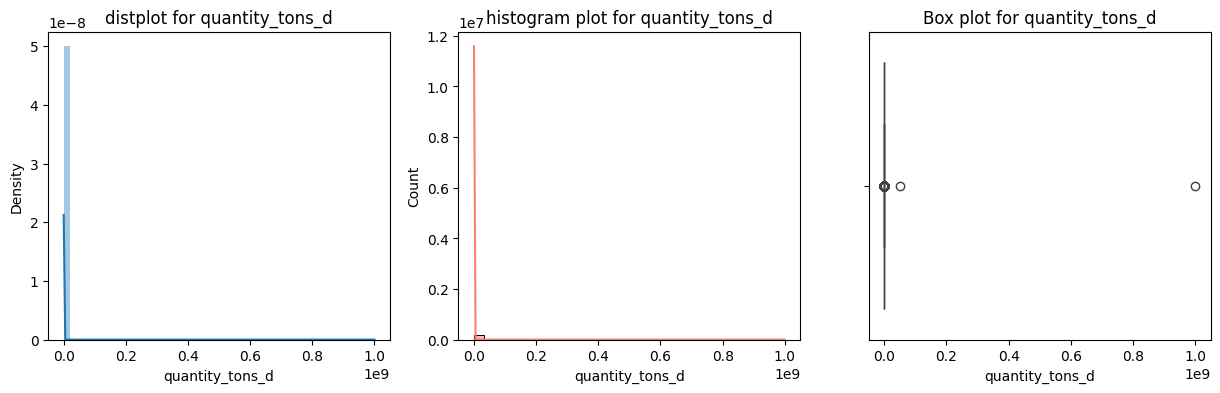

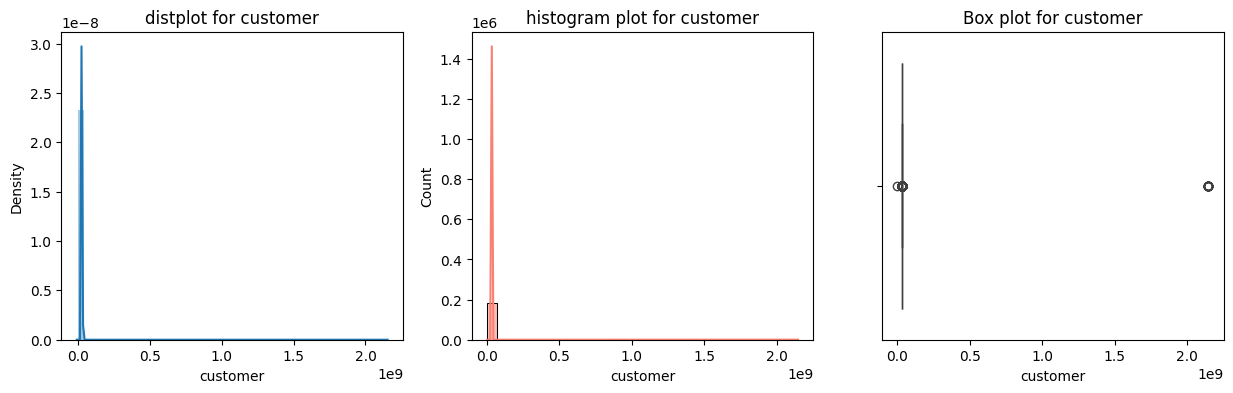

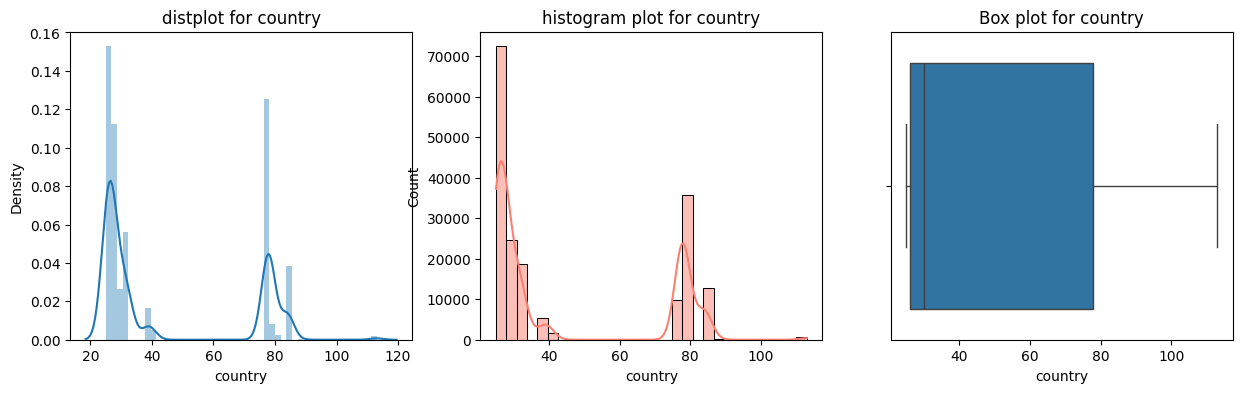

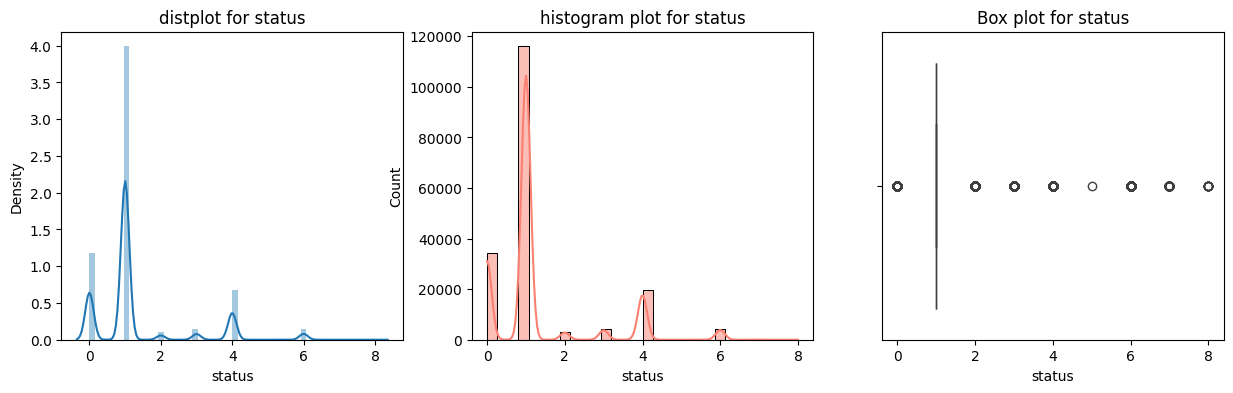

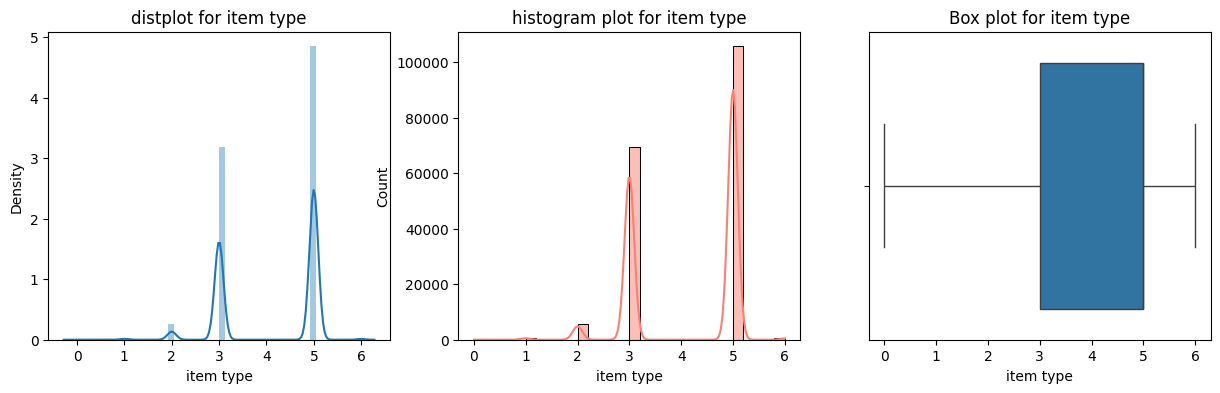

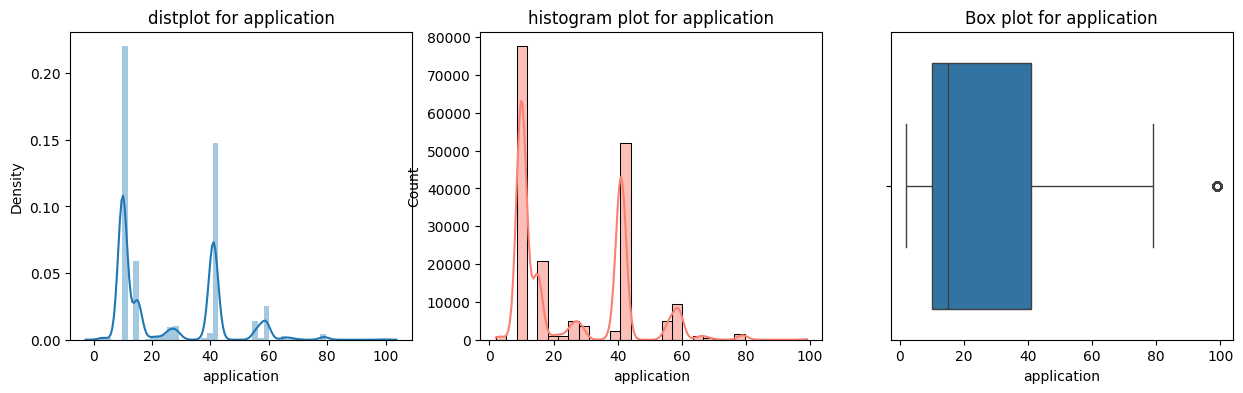

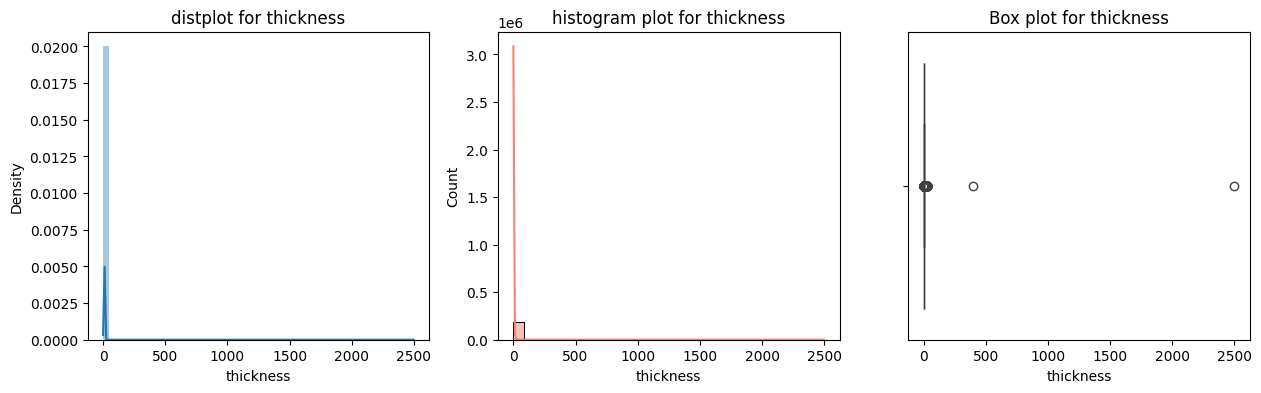

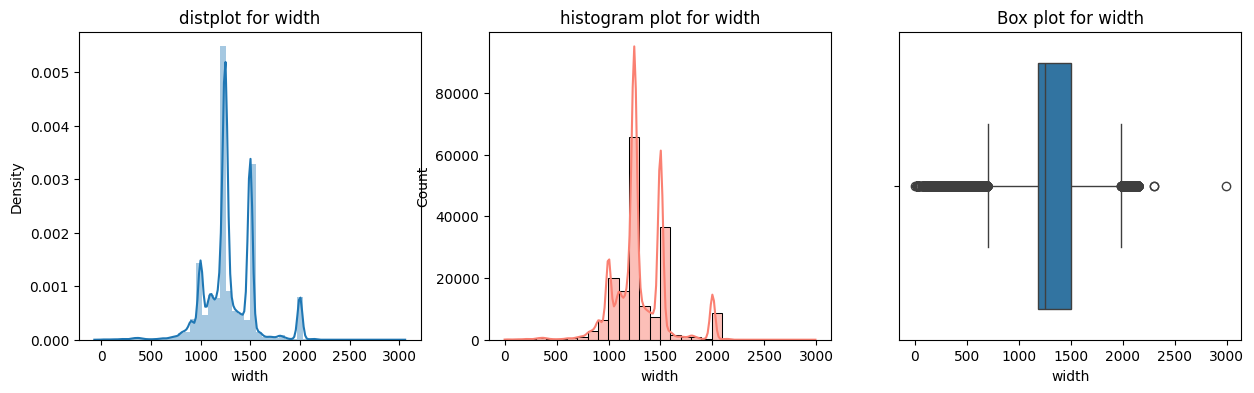

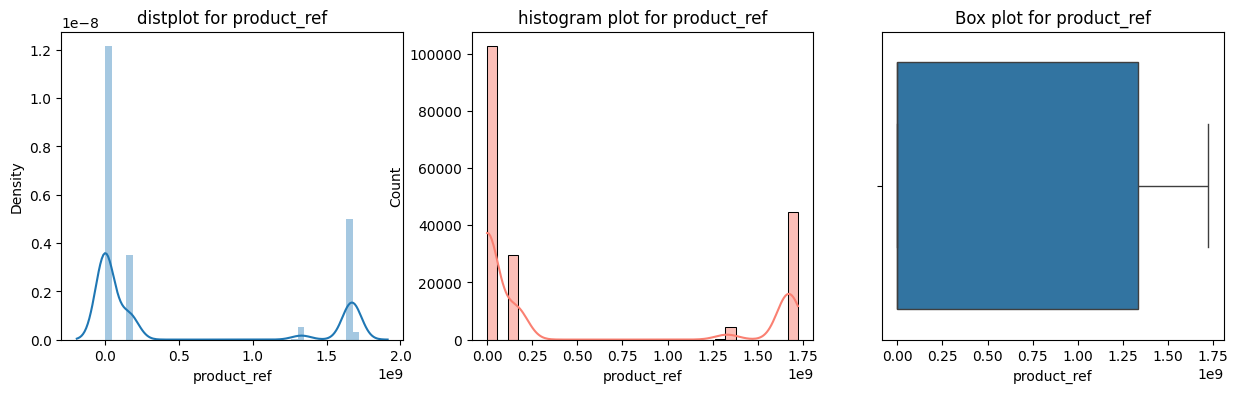

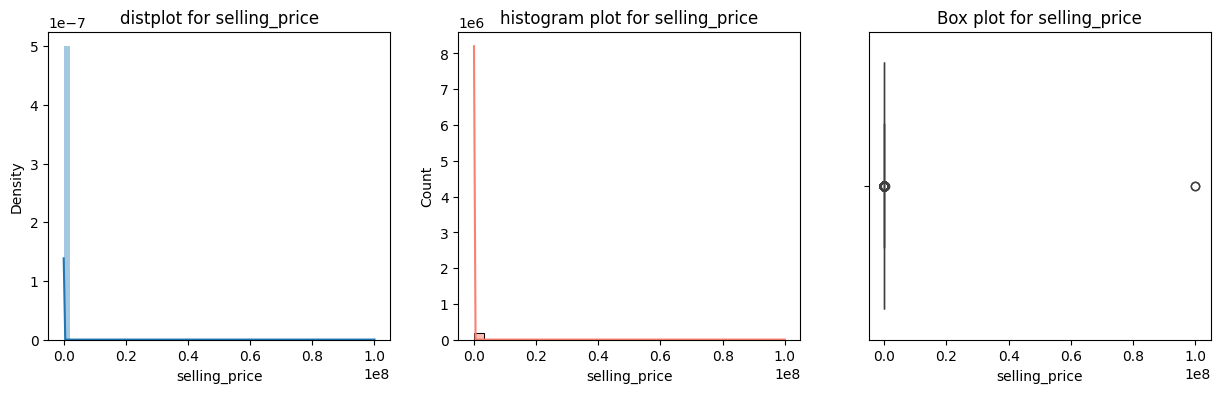

In [32]:
for i in skewed_columns:
    plot(df,i)

In [33]:
# skewed columns
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

In [34]:
df1 = df.copy()

In [35]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_d', 'quantity_tons_d',
       'delivery_date_d'],
      dtype='object')

In [36]:
#log transformation

df1['quantity_ton_log'] = np.log(df1['quantity_tons_d'])
df1['customer_log'] = np.log(df1['customer'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])

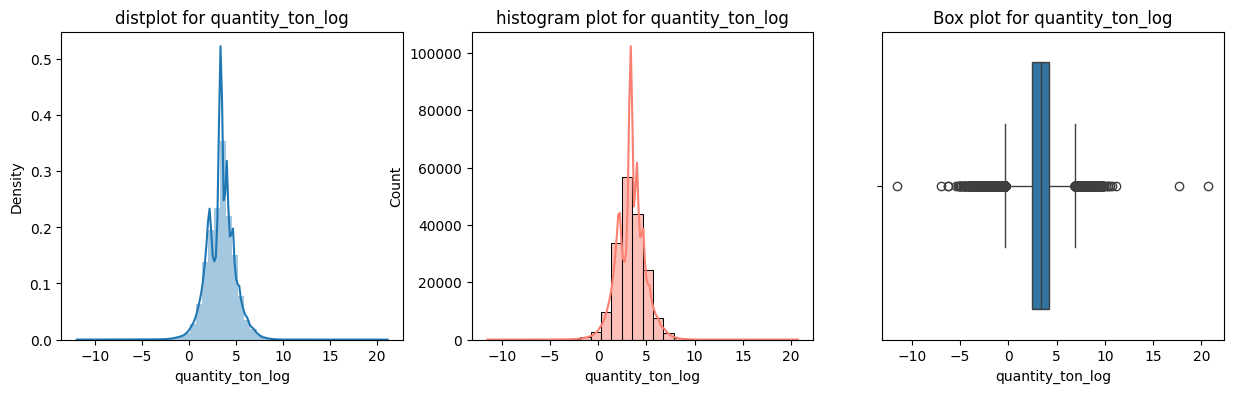

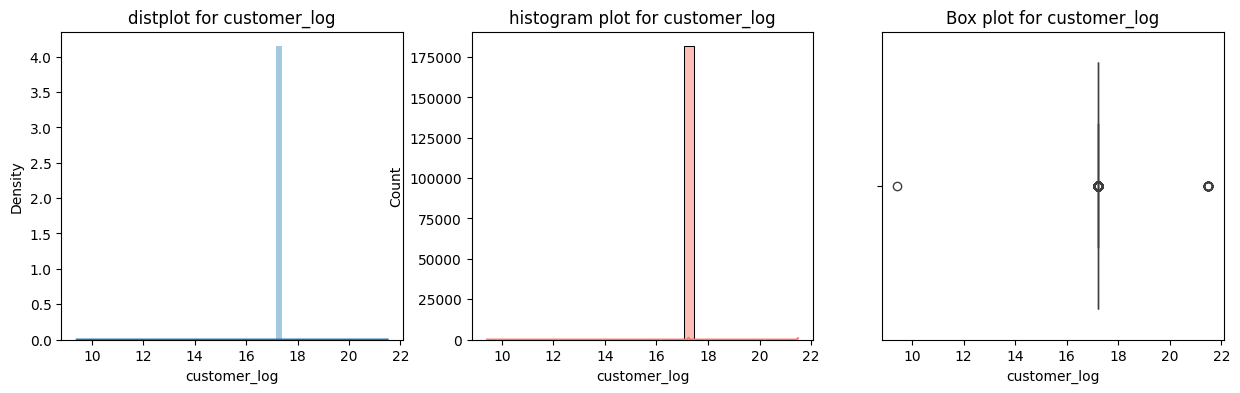

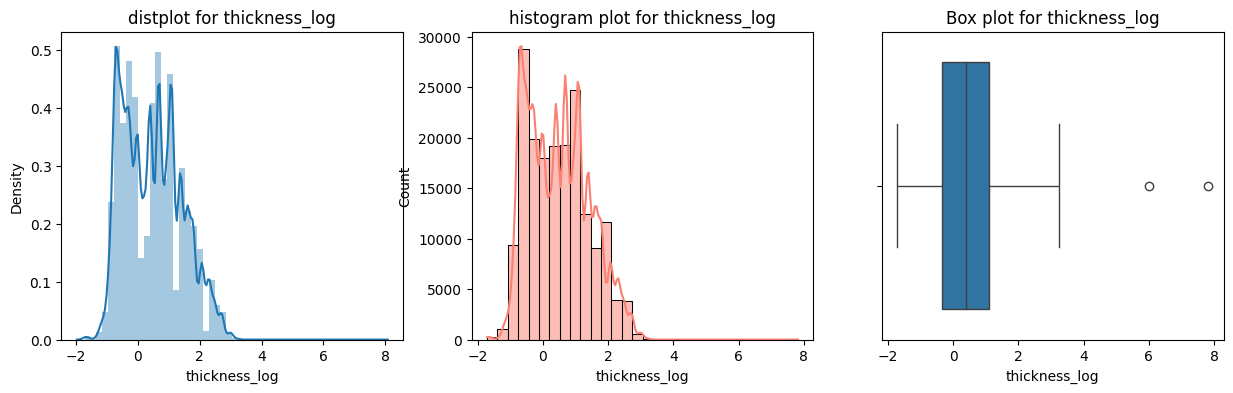

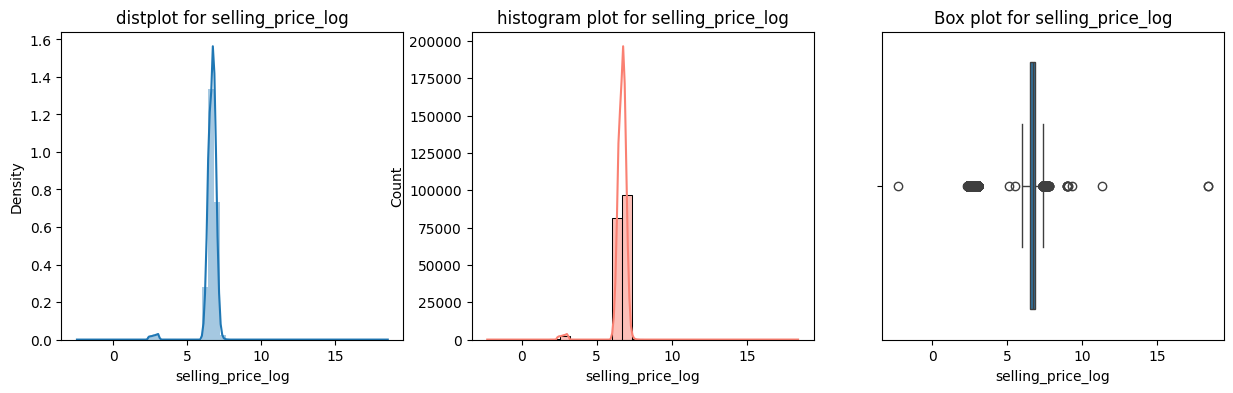

In [37]:
skewed_columns_2 = ['quantity_ton_log','customer_log', 'thickness_log', 'selling_price_log' ]
for i in skewed_columns_2:
    plot(df1,i)

In [38]:
# outliers handling - interquartile range (IQR) method

df2 = df1.copy()


In [39]:
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_d,quantity_tons_d,delivery_date_d,quantity_ton_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,54.151139,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,768.024839,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,386.127949,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,202.411065,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,785.526262,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [40]:
#(IQR) The interquartile range is the best measure of variability for skewed distributions or data sets with outliers
# (Ex: lower threshold = 5 and upper threshold = 20)
#  upper threshold values (>20) are converted to upper threshold value (20) in features
#  lower threshold values (<5)  are converted to lower threshold value (5)  in features


def outlier (df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3-q1

    upper_threshold = q3+(1.5*iqr)
    lower_threshold = q1-(1.5*iqr)

    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [41]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181673.0,2.020738e+07,2.411052e+04,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07


In [42]:
df2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_d', 'quantity_tons_d',
       'delivery_date_d', 'quantity_ton_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [43]:
outlier_columns = ['quantity_ton_log', 'customer_log','thickness_log', 'selling_price_log', 'width', 'application' ]

for i in outlier_columns:
    outlier(df2,i)

In [44]:
df2.describe().T    

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.560516e+01,1.771817e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,8.750000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181673.0,2.020738e+07,2.411052e+04,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07


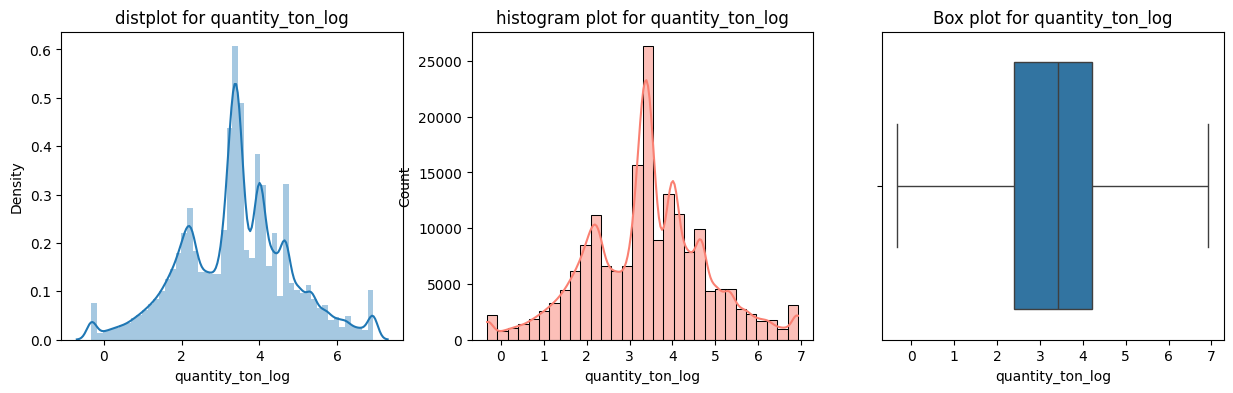

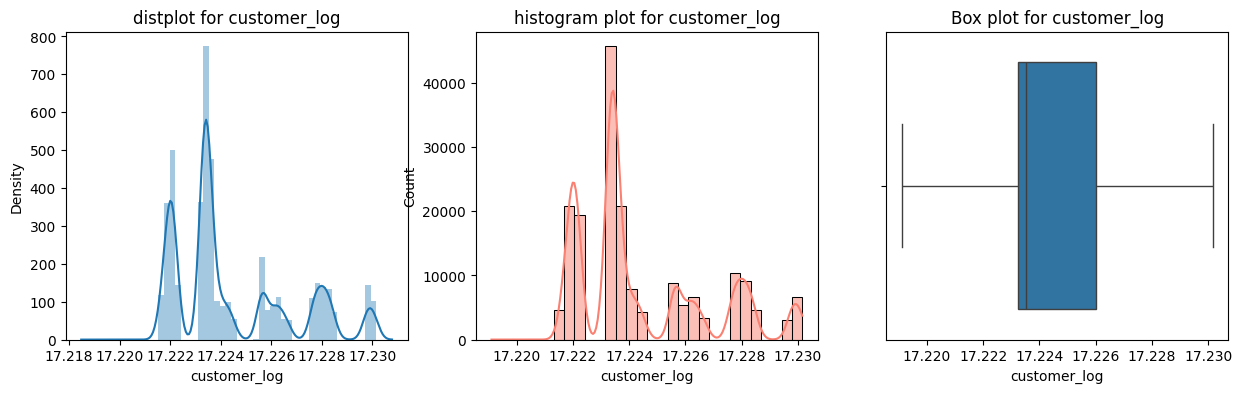

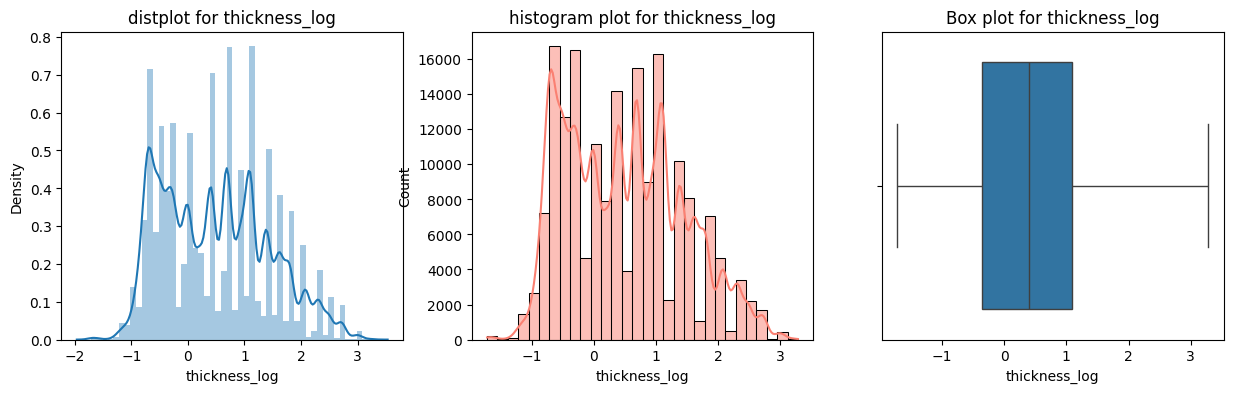

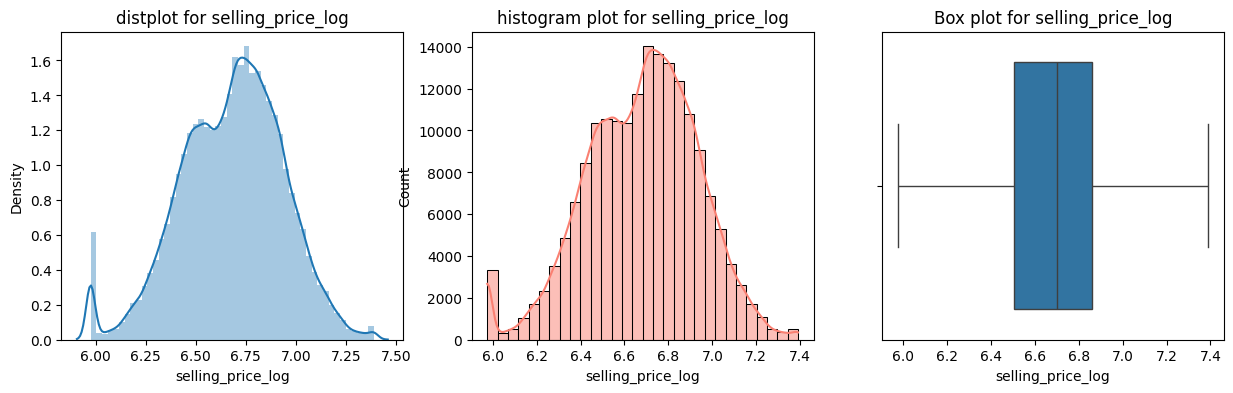

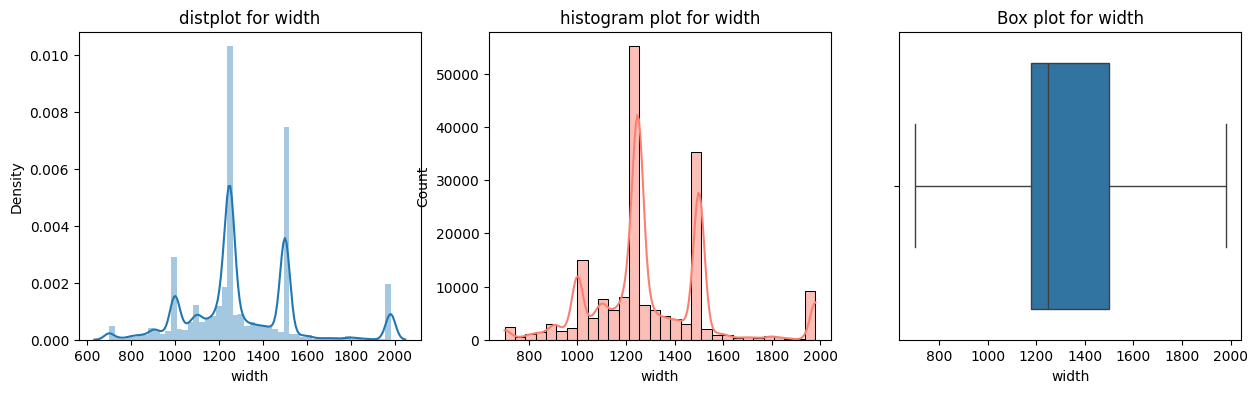

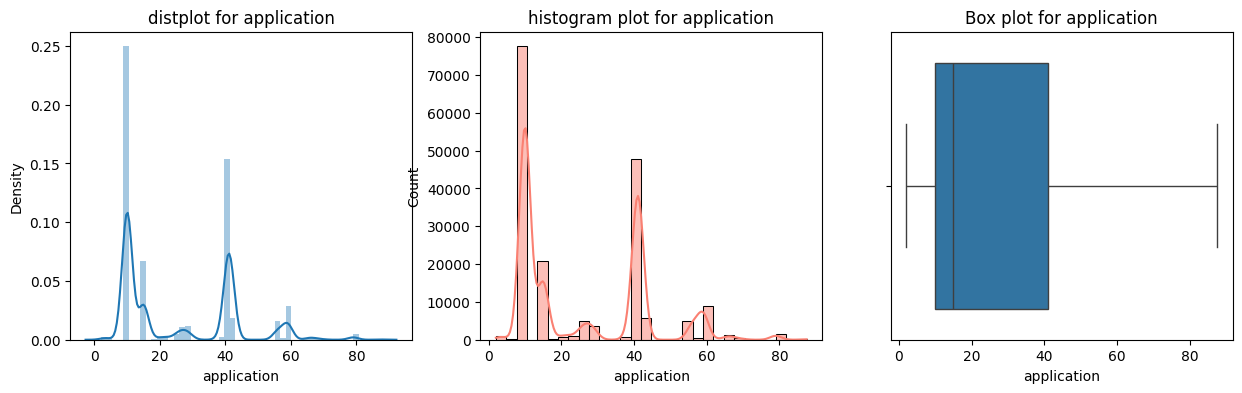

In [45]:
for i in outlier_columns:
    plot(df2,i)

In [46]:
#droping the unwanted columns
#skewed columns [quantity_tons_d, customer, thickness, selling_price]

df3 = df2.drop(columns = ["quantity_tons_d", "customer", "thickness", "selling_price"])

In [47]:
df3

,item_date,quantity tons,country,status,item type,application,width,product_ref,delivery date,item_date_d,delivery_date_d,quantity_ton_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.4824216,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816
181669,20200702.0,208.0864686,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426
181670,20200702.0,4.235593568,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105
181671,20200702.0,-2000,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595


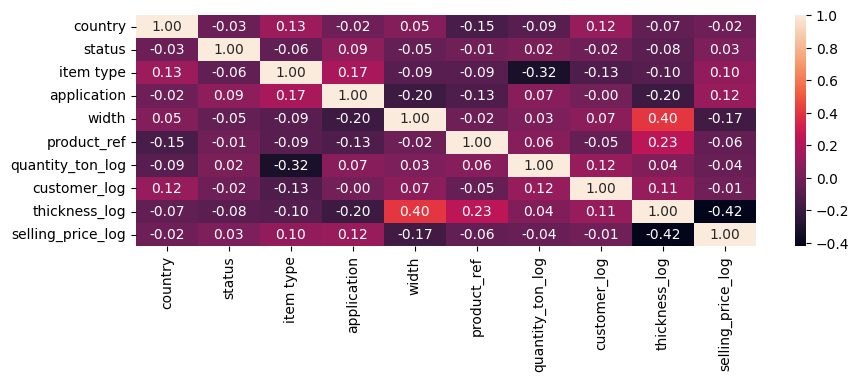

In [48]:
#checking the correlation with using the heatmap
# the high correlations are "-0.42", "0.40", "-0.32", "-0.20","0.23"


corr = df3.drop(columns = ["item_date","delivery date", "item_date_d", "delivery_date_d", "quantity tons"]).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True, fmt="0.2f")
plt.show()

In [49]:
# wrong delivery date handling using  machine learning prediction

In [53]:
df4 = df3.copy()

In [56]:
# forgot to drop at the beginning
df4.drop(['quantity tons'],axis=1, inplace=True)

In [57]:
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_d,delivery_date_d,quantity_ton_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [58]:
df4.dtypes

item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_d           object
delivery_date_d       object
quantity_ton_log     float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [59]:
#converting the datatypes (object to datatime format)
df4["delivery_date_d"] = pd.to_datetime(df4["delivery_date_d"])
df4["item_date_d"] =  pd.to_datetime(df4["item_date_d"])

In [60]:
# identifying the difference of the "delivery date" and the "items date"

df4["date_differ"] = (df4["delivery_date_d"]- df4["item_date_d"]).dt.days

In [63]:
df4["date_differ"].head()

0    91
1     0
2   -90
3   -90
4   -31
Name: date_differ, dtype: int64

In [64]:
# some values have a negative values
# it's mean the "delivery date provides , the previous date then the "item date"
# so this is not possible , so we want to predic the delivery date for the some datas

#creating the another 3 columns using the "item_date_d"
# it is usefull for the delivery date prediction

In [65]:
#creating the another 3 columns using the "item_date_1"
# it is usefull for the delivery date prediction

df4["item_date_day"] = df4["item_date_d"].dt.day
df4["item_date_month"] = df4["item_date_d"].dt.month
df4["item_date_year"] = df4["item_date_d"].dt.year

In [66]:
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_d,delivery_date_d,quantity_ton_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021


In [67]:
#separating the posive values(pv) dataframe 

df4_pv = df4[df4["date_differ"]>=0]
df4_pv.reset_index(drop=True, inplace=True)

In [69]:
df4_pv

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_d,delivery_date_d,quantity_ton_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,17.223450,0.405465,6.890609,0,1,4,2021
3,20210401.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,17.223667,-0.967584,5.975038,91,1,4,2021
4,20210401.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,17.228025,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165560,20200702.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020


In [70]:
df4_nv = df4[df4["date_differ"]<0]
df4_nv.reset_index(drop=True, inplace=True)

In [71]:
df4_nv

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_d,delivery_date_d,quantity_ton_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
1,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
2,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021
3,20210401.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,17.228050,-0.385662,6.836259,-90,1,4,2021
4,20210401.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,17.228050,-0.597837,6.860664,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020


In [72]:
# now we want to create the model for delivery date prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [73]:
df4_pv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_d', 'delivery_date_d',
       'quantity_ton_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [74]:
# To find the best algorithm for the "delivery date" prediction

def accuracy_date_prediction(df,algorithm):
    x = df.drop(columns = ["item_date_d","delivery_date_d", "date_differ"])
    y = df["date_differ"]

    # train test splitting
    x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

    model = algorithm().fit(x_train,y_train)
    y_pred = model.predict(x_test)

    # checking accuracy score

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)

    metrics = {"R2 Score":r2,
               "Mean Squared error":mse,
               "root mean squared error":rmse,
               "Mean absolute error": mae
               }
    return metrics
    

In [76]:
print(accuracy_date_prediction(df4_pv, DecisionTreeRegressor))
print(accuracy_date_prediction(df4_pv, RandomForestRegressor))
print(accuracy_date_prediction(df4_pv, ExtraTreesRegressor))
print(accuracy_date_prediction(df4_pv, GradientBoostingRegressor))
print(accuracy_date_prediction(df4_pv, AdaBoostRegressor))
print(accuracy_date_prediction(df4_pv, XGBRegressor))

{'R2 Score': 0.997270295058018, 'Mean Squared error': 4.235104037689125, 'root mean squared error': 2.0579368400631552, 'Mean absolute error': 0.01513000936188204}
{'R2 Score': 0.9971919394866191, 'Mean Squared error': 4.356671754295895, 'root mean squared error': 2.0872641793256297, 'Mean absolute error': 0.01625766315344427}
{'R2 Score': 0.9992844569332281, 'Mean Squared error': 1.1101563706097304, 'root mean squared error': 1.0536395828791412, 'Mean absolute error': 0.015955968954791202}
{'R2 Score': 0.9880340769401775, 'Mean Squared error': 18.564984180501586, 'root mean squared error': 4.308710268804528, 'Mean absolute error': 2.9475369100309674}
{'R2 Score': 0.7464028440379029, 'Mean Squared error': 393.4529049801835, 'root mean squared error': 19.835647329497053, 'Mean absolute error': 16.562072519020617}
{'R2 Score': 0.9990133443840025, 'Mean Squared error': 1.5307841953372214, 'root mean squared error': 1.2372486392545443, 'Mean absolute error': 0.2077463917833655}


In [77]:
# Random Forest algorithm is low bias and reduce overfitting compared to others.
# so we are going to try random forest algorithm

In [78]:
# model for the randomforest

def RandomForest(train_df, test_df):
    x = train_df.drop(columns= ["item_date_d","delivery_date_d", "date_differ"])
    y = train_df["date_differ"]

    # train test splitting
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
    model = RandomForestRegressor().fit(x_train,y_train)

    data = test_df.drop(columns= ["item_date_d","delivery_date_d", "date_differ"])

    y_pred = model.predict(data)

    return y_pred

In [79]:
date_difference = RandomForest(df4_pv, df4_nv)

In [80]:
date_difference

array([16.54, 16.53,  0.  , ..., 30.  , 30.  , 30.  ])

In [81]:
# changing the "date_differ" datatype float into int

date_difference_d = []
for i in date_difference:
    dd = int(round(i,0))
    date_difference_d.append(dd)


In [82]:
df4_nv["date_differ"] = pd.DataFrame(date_difference_d)

In [83]:
df4_nv.isnull().sum()

item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_d          0
delivery_date_d      0
quantity_ton_log     0
customer_log         0
thickness_log        0
selling_price_log    0
date_differ          0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [84]:
# to find the delivery date using "item_date_d" and "date_differ"
# Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). 
# This method converts an argument from a recognized timedelta format / value into a Timedelta type.
def find_delivery_date(item_date, date_differ):
    date = item_date+ pd.to_timedelta(date_differ, unit = "D")
    return date

In [86]:
df4_nv["delivery_date_d"] = find_delivery_date(df4_nv["item_date_d"],df4_nv["date_differ"])

In [87]:
# Concadinating the two dataframes(df4_pv,df4_nv) based on the rows

df_final = pd.concat([df4_pv, df4_nv], axis=0, ignore_index=True)

In [89]:
df_final

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_d,delivery_date_d,quantity_ton_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,17.223450,0.405465,6.890609,0,1,4,2021
3,20210401.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,17.223667,-0.967584,5.975038,91,1,4,2021
4,20210401.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,17.228025,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020


In [90]:
# Now we create the three new columns using the "delivery_date_1"

df_final['delivery_date_day'] = df_final["delivery_date_d"].dt.day
df_final['delivery_date_month'] = df_final["delivery_date_d"].dt.month
df_final['delivery_date_year'] = df_final["delivery_date_d"].dt.year

In [91]:
df_final.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_d,delivery_date_d,...,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,...,17.221905,0.693147,6.749931,91,1,4,2021,1,7,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,-0.223144,6.953684,0,1,4,2021,1,4,2021
2,20210401.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,0.405465,6.890609,0,1,4,2021,1,4,2021
3,20210401.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,...,17.223667,-0.967584,5.975038,91,1,4,2021,1,7,2021
4,20210401.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,...,17.228025,-0.510826,7.217443,91,1,4,2021,1,7,2021


In [94]:
len(df_final.columns)

21

In [95]:
# Dropping the unwanted columns
df_final.drop(columns=["item_date","delivery date","item_date_d","delivery_date_d", "date_differ"], inplace=True)

In [96]:
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_ton_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [97]:
#saving tthe dataframe
# df_final.to_csv("Industrial_Copper_tr_fil.csv", index=False)

In [98]:
import pandas as pd

In [4]:
df_final= pd.read_csv("Industrial_Copper_tr_fil.csv")

In [100]:
# This DataFrame doesnt have any null values and catagorical columns so our dataset is ready to the ML prediction

In [101]:
#classification method to predict won or lose

In [5]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [6]:
df_class = df_final.copy()

In [7]:
df_c = df_class[(df_class["status"] == 1) | (df_class["status"] == 0)]

In [8]:
df_c

,country,status,item type,application,width,product_ref,quantity_ton_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021
5,25.0,1,5.0,41.0,1165.0,1668701718,6.446714,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020


In [9]:
df_c["status"].value_counts()

1    116012
0     34438
Name: status, dtype: int64

In [10]:
len(df_c.columns)

16

In [11]:
x = df_c.drop(columns=["status"], axis=1)

In [12]:
y = df_c["status"]

In [13]:
x.shape

(150450, 15)

In [14]:
y.shape

(150450,)

In [16]:
x_new, y_new = SMOTETomek().fit_resample(x,y)

In [17]:
x_new.shape, y_new.shape

((230114, 15), (230114,))

In [18]:
y_new.value_counts()
# now the data is balanced

1    115057
0    115057
Name: status, dtype: int64

In [117]:
# so, we continue the ML prediction

In [19]:
# finding which will suit the efficient algorithm

def accuracy_checking(x_data, y_data, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2 , random_state=42)

    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    #checking accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    metrics = {"Algorithm": algorithm.__name__,
               "Accuracy_Train": accuracy_train,
               "Accuracy_test":accuracy_test}
    
    return metrics

In [20]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_test': 0.9508474576271186}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_test': 0.9697906281156531}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_test': 0.9748421402459289}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8146144898637421, 'Accuracy_test': 0.8126287803256896}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.836864406779661, 'Accuracy_test': 0.8345962113659023}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9457959454968428, 'Accuracy_test': 0.9313393153871719}


In [21]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_test': 0.9625187406296851}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_test': 0.9814223323121049}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_test': 0.9840949090672055}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7739052968368905, 'Accuracy_test': 0.7773721834734807}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8171013248882346, 'Accuracy_test': 0.8169176281424505}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9545876767468263, 'Accuracy_test': 0.9474827803489559}


In [122]:
# after oversampling we got good accuracy
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# so we want the reduce the overfitting.
# RandomForestClassifier is good 

In [127]:
# # get the high accuracy using hyperparameter tuning method with using of the gridsearchCV

# x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.2, random_state=42)

# parameters= {"max_depth": [2,5,10,20],
#              "min_samples_split": [2,5,10],
#              "min_samples_leaf": [1,2,4],
#              "max_features": ['sqrt', 'log2', None]}

# gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
# gridsearch.fit(x_train,y_train)


In [23]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=20, max_features= None, min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))



Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9853061800957136
Accuracy_Test:  0.9693631445146992
  
Confution_matrix for Test
--------------------------
[[22823   354]
 [ 1056 21790]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23177
           1       0.98      0.95      0.97     22846

    accuracy                           0.97     46023
   macro avg       0.97      0.97      0.97     46023
weighted avg       0.97      0.97      0.97     46023



In [24]:
FP,TP, threshold = roc_curve(y_true=y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
auc_curve = auc(x=FP, y=TP)
print("auc curve", auc_curve)

[2 1 0]
[0.         0.01527376 1.        ]
[0.         0.95377747 1.        ]
auc curve 0.9692518518664288


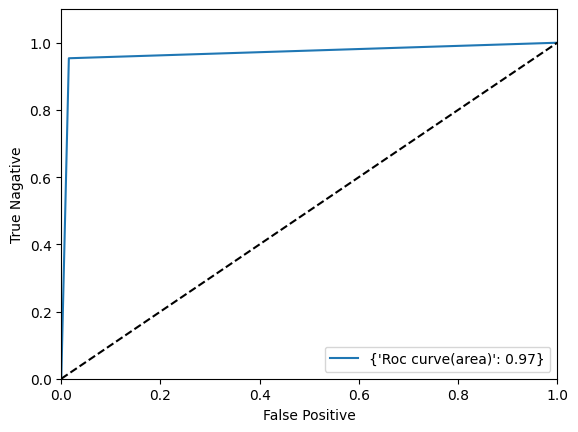

In [25]:
roc_point = {"Roc curve(area)": round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive")
plt.ylabel("True Nagative")
plt.plot([0,1], [0,1], "k--")
plt.legend(loc= "lower right")
plt.show()

In [26]:
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user = model.predict(user_data)
if y_pred_user == 1:
    print("won")
else:
    print("lose")

won


In [27]:
with open("classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [30]:
with open("C:/Users/rdine/Data_Science/data_science_practise/DataScience_projects/copper/classification_model.pkl", "rb") as f1:
    class_model = pickle.load(f1)

In [31]:
user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred_user = class_model.predict(user_data)

if y_pred_user ==1:
    print("Won")
else:
    print("lose")

lose


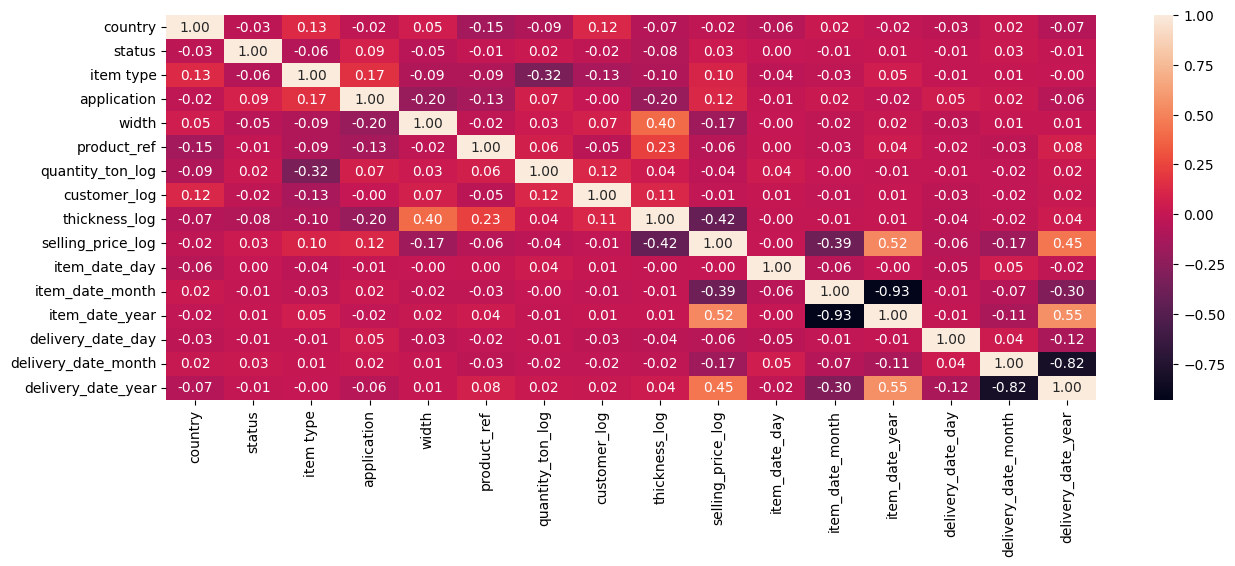

In [32]:
corr = df_final.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot= True, fmt ="0.2f")
plt.show()

In [33]:
# regression method predict the selling price

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [34]:
df_regg = df_final.copy()

In [37]:
# find the best model to predict the selling price

def accuracy_regressor(df,algorithm):

    x = df.drop(columns= ["selling_price_log"], axis=1)
    y = df["selling_price_log"]

    #train test split
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    metrics = {"Algorithm": algorithm.__name__,
               "R2_train": r2_train,
               "R2 test":r2_test}
    
    return metrics

In [38]:
print(accuracy_regressor(df_regg,DecisionTreeRegressor))
print(accuracy_regressor(df_regg,RandomForestRegressor))
print(accuracy_regressor(df_regg,ExtraTreesRegressor))
print(accuracy_regressor(df_regg,AdaBoostRegressor))
print(accuracy_regressor(df_regg,GradientBoostingRegressor))
print(accuracy_regressor(df_regg,XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9999206991163908, 'R2 test': 0.9256735438093617}
{'Algorithm': 'RandomForestRegressor', 'R2_train': 0.9940410283121793, 'R2 test': 0.9573998589899354}
{'Algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9999206991163908, 'R2 test': 0.9544995430638574}
{'Algorithm': 'AdaBoostRegressor', 'R2_train': 0.636011656721274, 'R2 test': 0.6338496390061926}
{'Algorithm': 'GradientBoostingRegressor', 'R2_train': 0.8872750599334522, 'R2 test': 0.8876677121668806}
{'Algorithm': 'XGBRegressor', 'R2_train': 0.9522175743129402, 'R2 test': 0.9467262766339302}


In [39]:
x = df_regg.drop(columns= ["selling_price_log"], axis=1)
y = df_regg["selling_price_log"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9865969342276449, 0.9564065568701038)

In [40]:
x = df_regg.drop(columns= ["selling_price_log"], axis=1)
y = df_regg["selling_price_log"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2':r2,
             'mean_absolute_error':mae,
             'mean_squared_error':mse,
             'root mean squared error':rmse}

metrics_r

{'R2': 0.9563043318586733,
 'mean_absolute_error': 0.032429967358973584,
 'mean_squared_error': 0.002877057977613904,
 'root mean squared error': 0.05363821378097806}

In [41]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)
print("predict selling price with log", y_pred[0])
print("prect selling price without log",np.exp(y_pred[0]))

predict selling price with log 7.1418652277686245
prect selling price without log 1263.7834360244597


In [42]:
import pickle

In [43]:
with open("Regression_Model.pkl","wb") as r:
    pickle.dump(model_r,r)

In [44]:
with open("Regression_Model.pkl","rb") as r1:
    regg_model = pickle.load(r1)

In [45]:
df_final

,country,status,item type,application,width,product_ref,quantity_ton_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,5.975038,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020


In [46]:
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = regg_model.predict(user_data)
print("predict selling price with log", y_pred[0])
print("predict selling price without log", np.exp(y_pred[0]))

predict selling price with log 6.884183010408869
predict selling price without log 976.7033871579488
